# Image Classification using CIFAR-10 dataset
it contains 60000 32 x 32 color images of 10 different categories/class
with 6000 images per class

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### 1) Load the dataset

In [14]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape
# x contains the 50000 training images of 32x32x3 (color image).
# images are 3d matrix.

(50000, 32, 32, 3)

In [16]:
y_train.shape
# y contains the 10 classes corresponding to the images.

(50000, 1)

#### visualising the images

In [23]:
y_train[1]

array([9], dtype=uint8)

In [25]:
# y_train contains a 2d matrix that represents classes, 
# we have to make it 1D array so we can easily show the classes on the plot.

y_train = y_train.reshape(-1,) # we don't want to change first parameter (50000), hence put -1.
y_train[1]

9

In [27]:
# cool, it;s a 1D array now.
# do the same with y_test

y_test = y_test.reshape(-1,)

In [29]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

### 2) Let's plot some images to see what they are

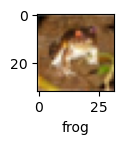

In [48]:
def plot_image(X, y, index):
    plt.figure(figsize = (15,1)) # reducing the dimension for visualizing
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_image(X_train, y_train, 0)

## 3) Scaling / Normalizing Data

Since, the values are from 0 to 255, we have to scale it down to be between 0 and 1

In [54]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [56]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### 4) Modelling

##### let's create a ANN model first and then a CNN model

In [60]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'), # 2 hidden layers
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\ankit\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.3035 - loss: 1.9340
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4180 - loss: 1.6487
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4507 - loss: 1.5558
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4723 - loss: 1.4939
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4971 - loss: 1.4362


#### so, we can see that the accuracy is pretty low.

In [63]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.30      0.42      1000
           1       0.69      0.53      0.60      1000
           2       0.26      0.48      0.34      1000
           3       0.38      0.31      0.34      1000
           4       0.31      0.58      0.40      1000
           5       0.51      0.22      0.31      1000
           6       0.46      0.60      0.52      1000
           7       0.74      0.27      0.40      1000
           8       0.54      0.71      0.61      1000
           9       0.60      0.51      0.55      1000

    accuracy                           0.45     10000
   macro avg       0.52      0.45      0.45     10000
weighted avg       0.52      0.45      0.45     10000



## Now, lets make a CNN model

In [86]:
cnn = models.Sequential([

    # convolution layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3) , kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    # pooling layer
    layers.MaxPooling2D((2, 2)),

    #another set of convolution layer and pooling layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),

    #dense layer
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [88]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3652 - loss: 1.7448
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5851 - loss: 1.2176
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6440 - loss: 1.0590
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6787 - loss: 0.9685
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7090 - loss: 0.8895
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7308 - loss: 0.8302
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7486 - loss: 0.7829
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7682 - loss: 0.7213
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7820 - loss: 0.6871
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7977 - loss: 0.6454


In [90]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7152 - loss: 0.9244


[0.9343160390853882, 0.710099995136261]

In [92]:
y_pred = cnn.predict(X_test)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([2.3560082e-04, 1.7226490e-04, 6.0066953e-04, 9.3885326e-01,
       5.9624803e-05, 5.0887249e-02, 8.3185751e-03, 5.3107383e-04,
       1.9660607e-04, 1.4499298e-04], dtype=float32)

In [97]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[0] # it will return the index value of the maximum class

3

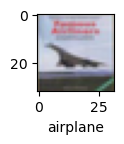

In [99]:
plot_image(X_test, y_test,3)